In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 64
num_classes = 10

2024-12-17 08:14:05.436052: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 08:14:05.474432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Splitting the data between train and test
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Get the shape of training and testing data.

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255
# Normalising the pixel values.

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


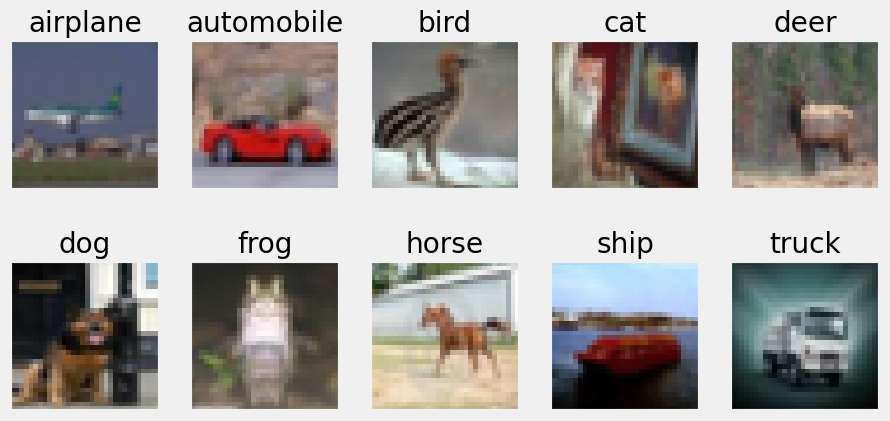

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()
# It plots the pixels of corresponding image category like below

In [4]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# One hot encoding

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# First convolutional layer with 64 filters, 3x3 kernel, zero-padding, and ReLU activation
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
# Output dimension: (32, 32, 64)

model.add(BatchNormalization())

# Second convolutional layer with 64 filters, 3x3 kernel, no padding, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# Output dimension: (30, 30, 64)

model.add(BatchNormalization())

# First max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Output dimension: (15, 15, 64)

model.add(Dropout(0.25))

# Third convolutional layer with 128 filters, 3x3 kernel, zero-padding, and ReLU activation
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# Output dimension: (15, 15, 128)

model.add(BatchNormalization())

# Fourth convolutional layer with 128 filters, 3x3 kernel, zero-padding, and ReLU activation
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# Output dimension: (15, 15, 128)

model.add(BatchNormalization())

# Second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Output dimension: (7, 7, 128)

model.add(Dropout(0.1))

# Flatten the output from convolutional layers
model.add(Flatten())
# Output dimension: 6272

# First dense layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))
# Output dimension: 512

model.add(Dropout(0.5))

# Output layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))
# Output dimension: 10

2024-12-17 08:14:17.340890: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-17 08:14:17.347803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-17 08:14:17.349157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple


/opt/conda/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


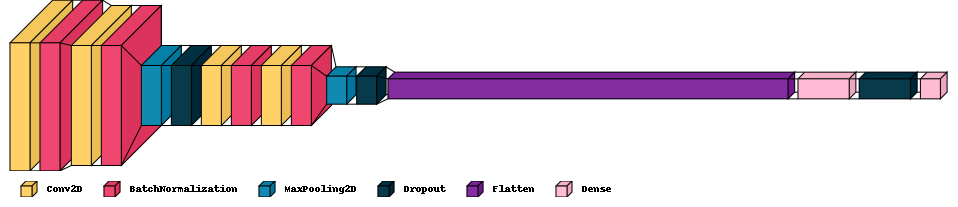

In [6]:
#To use this you have to run this cell (uncomment the lines), restart the kernel and run from top again

## Installing Visual Keras

import sys
!{sys.executable} -m pip install visualkeras 
!{sys.executable} -m pip install Pillow==9.5.0
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)

# : 

In [7]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

epochs=25

# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.15,
              shuffle=True)
# : 

Epoch 1/25


2024-12-17 08:14:38.922084: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-12-17 08:14:39.089039: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-12-17 08:14:39.328798: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-12-17 08:14:39.853941: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-17 08:14:40.043161: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f048c1397c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-17 08:14:40.043209: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor devi

665/665 [==============================] - 15s 17ms/step - loss: 1.6991 - accuracy: 0.4066 - val_loss: 1.6398 - val_accuracy: 0.4485
Epoch 2/25
665/665 [==============================] - 10s 16ms/step - loss: 1.3200 - accuracy: 0.5235 - val_loss: 1.8604 - val_accuracy: 0.4141
Epoch 3/25
665/665 [==============================] - 10s 16ms/step - loss: 1.1616 - accuracy: 0.5846 - val_loss: 1.1056 - val_accuracy: 0.6116
Epoch 4/25
665/665 [==============================] - 10s 16ms/step - loss: 1.0362 - accuracy: 0.6325 - val_loss: 1.2501 - val_accuracy: 0.5711
Epoch 5/25
665/665 [==============================] - 10s 16ms/step - loss: 0.9415 - accuracy: 0.6654 - val_loss: 0.9655 - val_accuracy: 0.6603
Epoch 6/25
665/665 [==============================] - 10s 16ms/step - loss: 0.8716 - accuracy: 0.6914 - val_loss: 0.9613 - val_accuracy: 0.6687
Epoch 7/25
665/665 [==============================] - 10s 16ms/step - loss: 0.8119 - accuracy: 0.7112 - val_loss: 1.0514 - val_accuracy: 0.6452
Epo

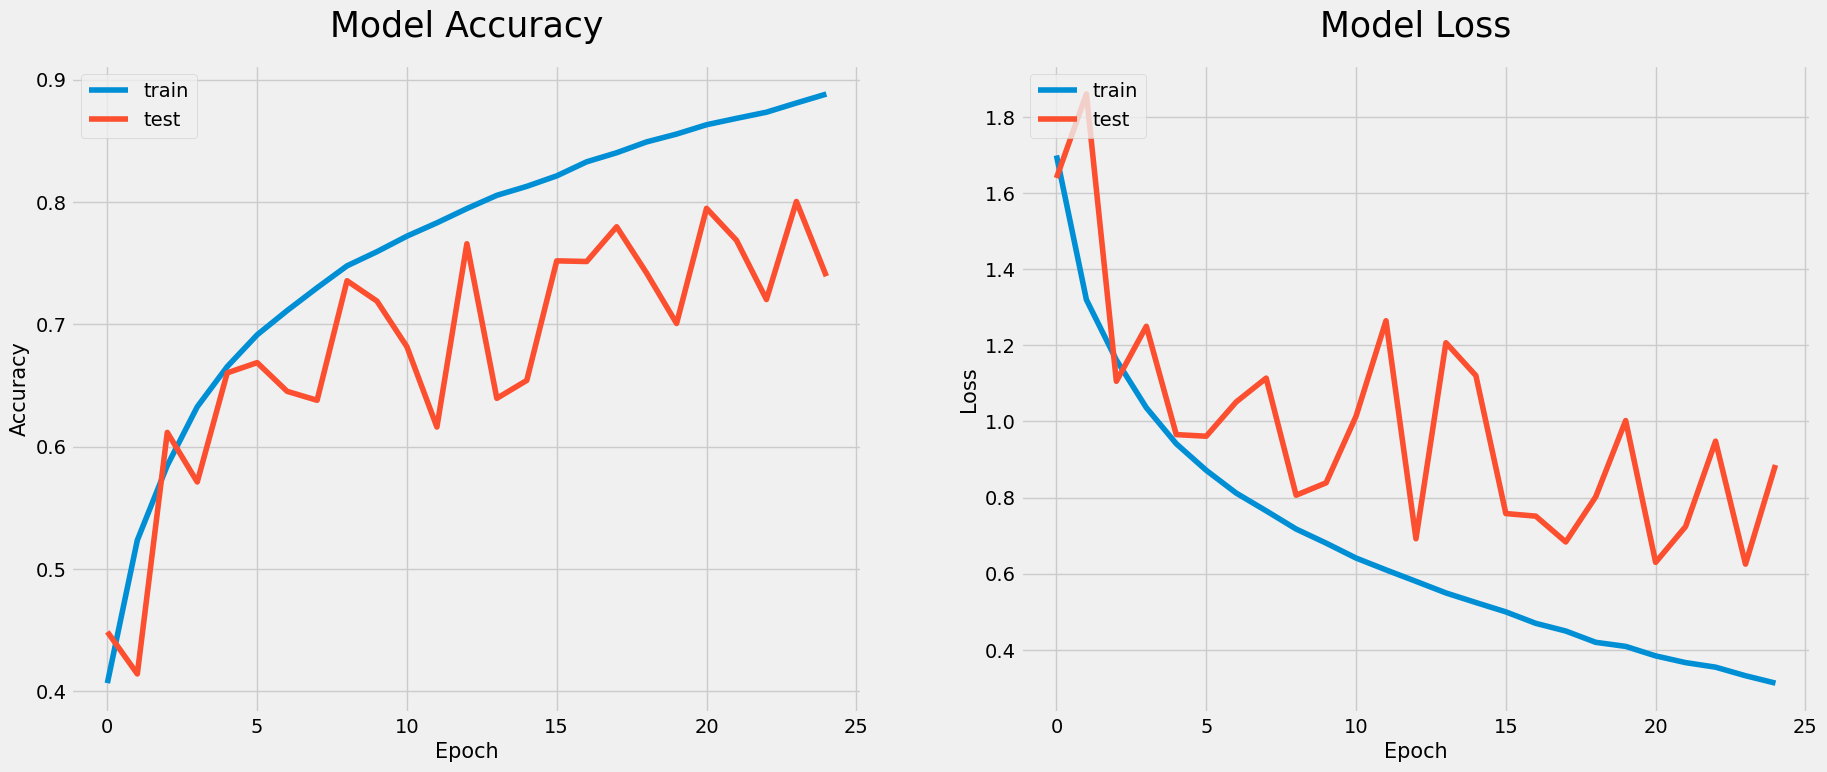

In [9]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
# :

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# :

313/313 [==============================] - 1s 2ms/step


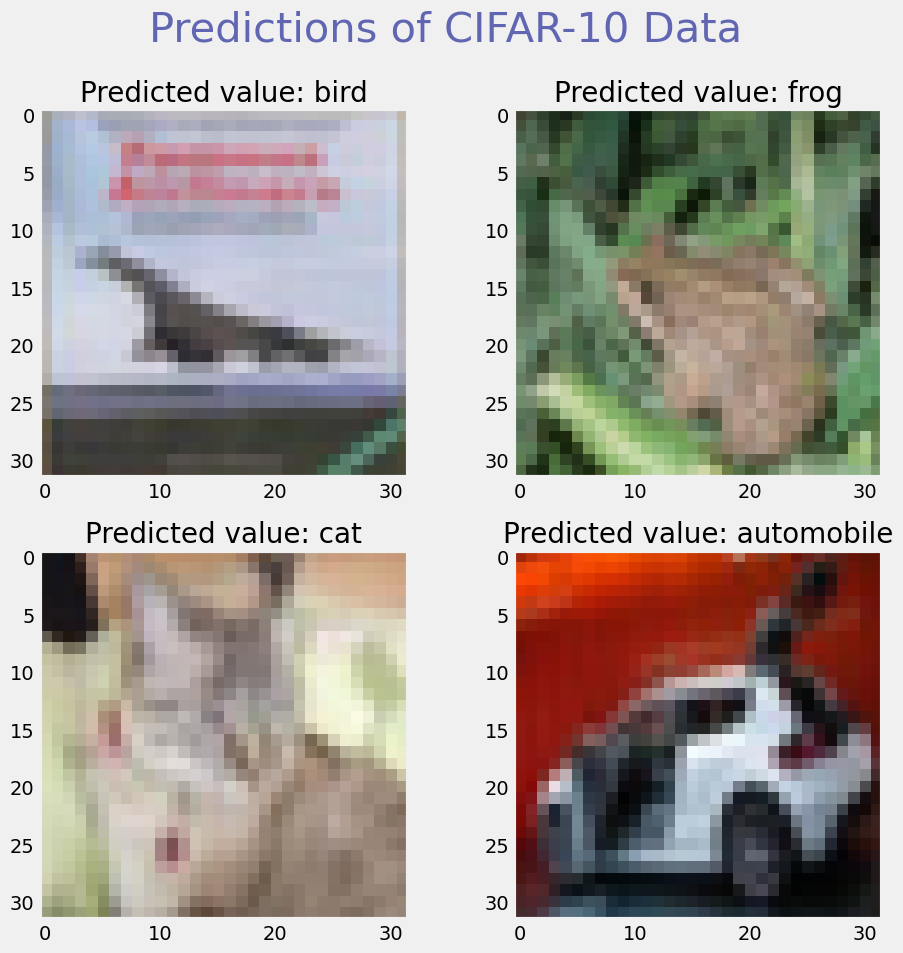

In [14]:
# Checking the predictions! (Hidden Input)
predictions = model.predict(x_test)

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 3
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()

In [11]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(x_test)
y_prediction_max = np.argmax(y_prediction, axis = 1)
y_test_max=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test_max, y_prediction_max , normalize='pred')
# : 

313/313 [==============================] - 1s 2ms/step


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test_max, y_prediction_max))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70      1000
           1       0.88      0.88      0.88      1000
           2       0.63      0.62      0.63      1000
           3       0.58      0.54      0.56      1000
           4       0.60      0.85      0.70      1000
           5       0.70      0.60      0.65      1000
           6       0.62      0.94      0.75      1000
           7       0.87      0.75      0.81      1000
           8       0.92      0.73      0.81      1000
           9       0.86      0.84      0.85      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000



<Axes: >

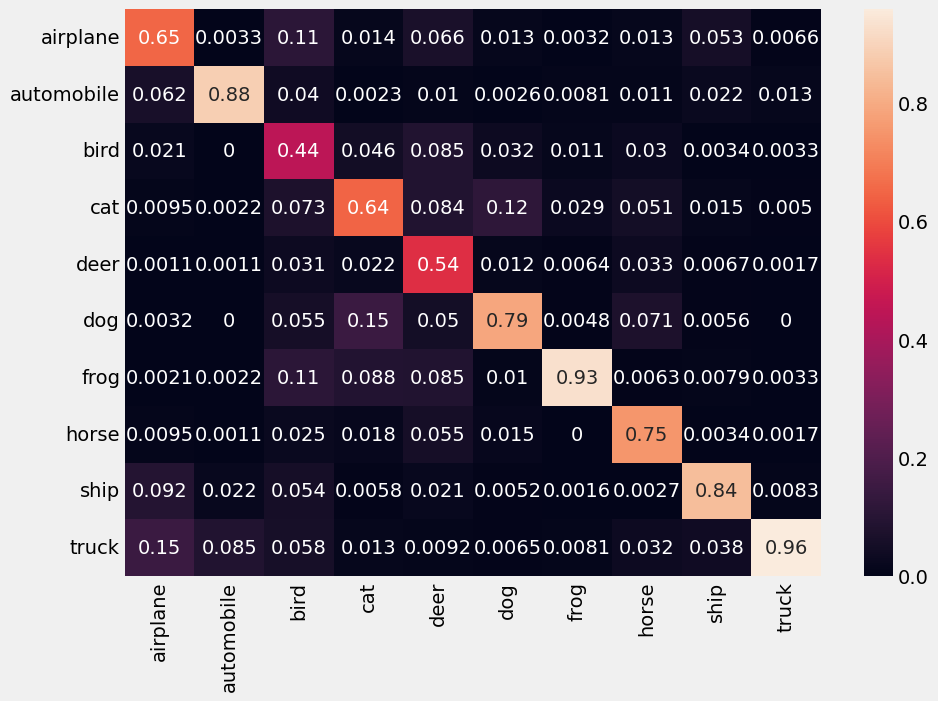

In [37]:
import seaborn as sn
import pandas as pd
plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(result, index=class_names, columns=class_names)
sn.heatmap(df_cm, annot=True)
# : 